In [2]:
# NAME: HAARISH V
# REGISTER NO: 212223230067

import numpy as ap
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
without_glass = cv2.imread("image_01.png",cv2.IMREAD_GRAYSCALE)
with_glass = cv2.imread("image_02.png",cv2.IMREAD_GRAYSCALE)
group_img = cv2.imread("image_03.png",cv2.IMREAD_GRAYSCALE)

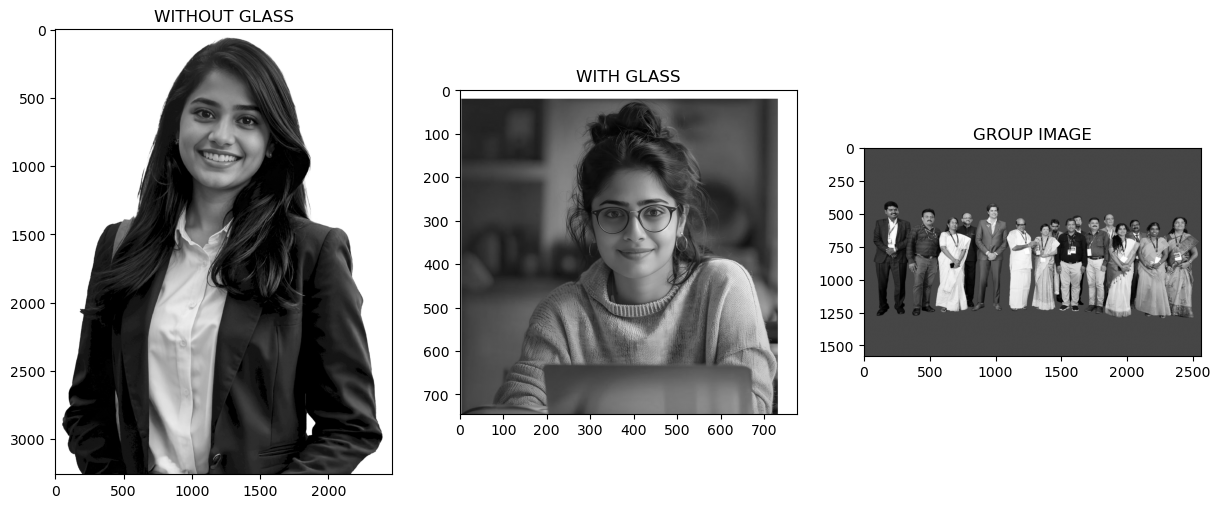

In [4]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(without_glass,cmap='gray');plt.title("WITHOUT GLASS")
plt.subplot(142);plt.imshow(with_glass,cmap='gray');plt.title("WITH GLASS")
plt.subplot(143);plt.imshow(group_img,cmap='gray');plt.title("GROUP IMAGE")
plt.show()

## Cascade Files
 OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [6]:
def detect_face(img):
    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img)

    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y),(x+w,y+h),(255,0,255),13)
        cv2.imshow('Face Detection',face_img)
    return face_img

In [7]:
result = detect_face(without_glass)

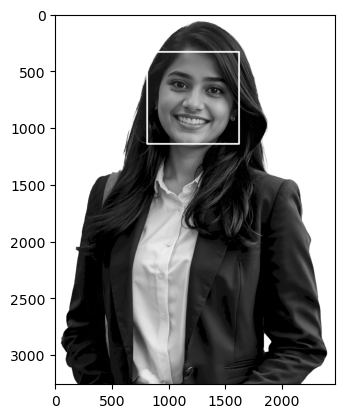

In [8]:
plt.imshow(result,cmap='gray')
plt.show()

In [9]:
result = detect_face(with_glass)

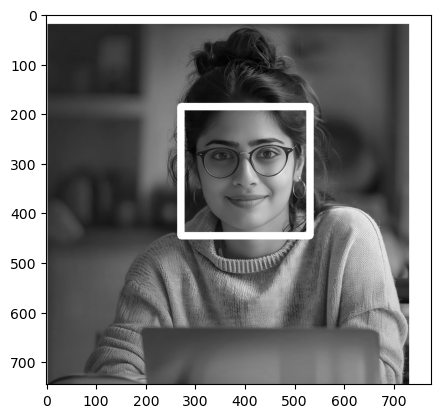

In [10]:
plt.imshow(result,cmap='gray')
plt.show()

In [11]:
result = detect_face(group_img)

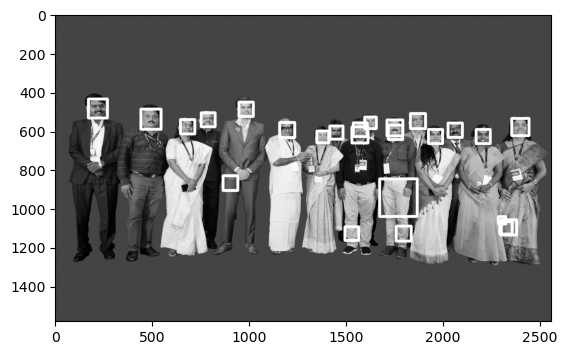

In [12]:
plt.imshow(result,cmap='gray')
plt.show()

## Eye Cascade File


In [13]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [14]:
def detect_eyes(img):
    face_img = img.copy()

    eyes = eye_cascade.detectMultiScale(face_img)

    for(x,y,w,h) in eyes:
         cv2.rectangle(face_img, (x,y),(x+w,y+h),(255,255,255),10)
    return face_img

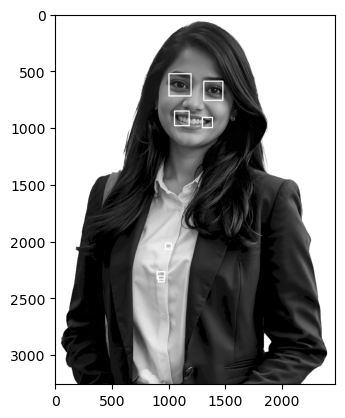

In [15]:
result = detect_eyes(without_glass)
plt.imshow(result,cmap='gray')
plt.show()

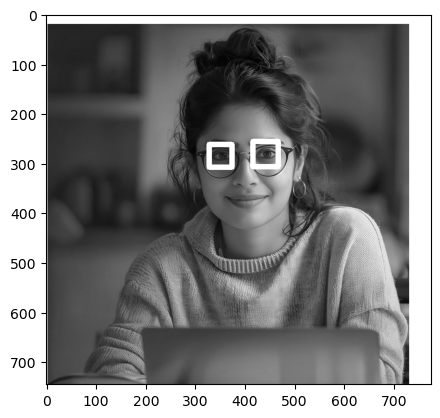

In [16]:
result = detect_eyes(with_glass)
plt.imshow(result,cmap='gray')
plt.show()

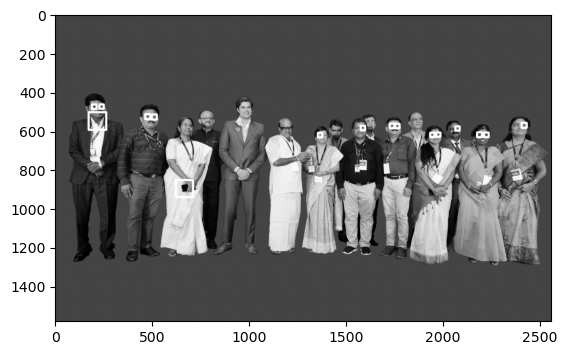

In [17]:
result = detect_eyes(group_img)
plt.imshow(result,cmap='gray')
plt.show()

## Face Detection in Video

In [23]:
cap = cv2.VideoCapture(0)
def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=3)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    return frame

while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, frame)
    cv2.imshow('Video Face Detection', canvas)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

cap.release()
cv2.destroyAllWindows()
